# Introduction

This Jupyter Notebook document was developed alongside my university course called "Operational Research & Business Intelligence" that I attended during my sixth semester of studies (February 2022 - July 2022) at Computer Science Department of Aristotle University of Thessaloniki (CSD AUTh)



**The main concept is the following:**

Your talent in data analysis was recently discovered by a well-known multinational
retail chain. You are urgently called to help the person in charge of Marketing in the analysis of 7537 transactions (baskets) made in a period of 75 daysand relate to 170 product codes. You have decided to use Python for specific resolution

# Exercise 1 - Downloading and preprocessing the dataset
First we need to download and make observations on our data. The dataset that is used throughout the exercises is the following:

https://drive.google.com/file/d/1lgB1CIbpqFVD1cIrL0XAOpiMp1mBh5IX/view?usp=sharing

The dataset can be downloaded by running the following cells.

In [5]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!gdown --id 1lgB1CIbpqFVD1cIrL0XAOpiMp1mBh5IX

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lgB1CIbpqFVD1cIrL0XAOpiMp1mBh5IX
To: /content/GroceriesInitial.csv
100% 823k/823k [00:00<00:00, 69.5MB/s]


## Some words about the dataset
The GroceriesInitial dataset is a dataset where each line represents a grocery transaction. Each column is an attribute of a transaction. These attributes are: total value of the transaction (basket_value), total days after transaction was made (recency_days), a unique identifier for each transaction (id) and finally the products purchased in the specific transaction. 

In [7]:
# Read the downloaded csv and show head information.
df = pd.read_csv('/content/GroceriesInitial.csv', delimiter=',', header='infer')
# Keeping a deep copy of the dataset used for preprocessing
preprodf = df.copy(deep = True)
df.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe(include='all')

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
count,7536.000000,7536.000000,7536.000000,7536,6720,5589,4532,3637,2833,2206,...,14,8,7,7,6,5,4,1,1,1
unique,NaN,NaN,NaN,101,144,153,151,149,137,138,...,13,7,6,7,5,4,3,1,1,1
top,NaN,NaN,NaN,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,...,waffles,bottled beer,chocolate,shopping bags,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,NaN,NaN,NaN,825,654,506,315,176,150,120,...,2,2,2,1,2,2,2,1,1,1
mean,4920.079485,5.036584,37.814225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2845.875602,3.692088,25.113222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.100000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2419.500000,2.200000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4927.000000,4.100000,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7375.250000,7.000000,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing/Transforming
Firstly, we need to distinguish the basket_value attribute into three different equally sized categories (low_value_basket, medium_value_basket, high_value_basket) so we can later use it with the mlxtend.preprocessing library to encode it into binary transaction data. This whole process is going to be achieved with the use of pandas.cut where we can cut an attribute into N different bins.

By splitting the attribute into 10 different bins, from 0 up to 25, we notice the following 3 equally sized bins:  [0 2.7] [2.7 6] [6 25].

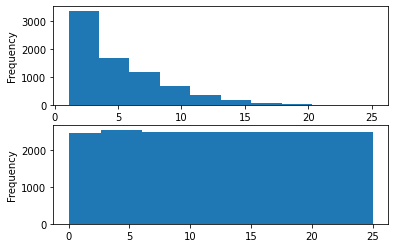

In [9]:
fig, axes = plt.subplots(nrows=2)

# Splitting the basket_value into 10 bins
df['basket_value'].plot.hist(ax=axes[0], bins=10)

# Splitting the basket_value into 3 equally sized low, medium, high bins
df['basket_value'].plot.hist(ax=axes[1], bins=[0, 2.7, 6, 25])

Using these 3 bins we can use pandas.cut to make 3 categories of basket_value.

In [10]:
preprodf['basket_value'] = pd.cut(preprodf['basket_value'], 
                                   bins=[0, 2.7, 6, 25], 
                                   labels=["low_value_basket", "medium_value_basket", "high_value_basket"])
preprodf[['basket_value']]

,basket_value
0,low_value_basket
1,medium_value_basket
2,low_value_basket
3,high_value_basket
4,low_value_basket
...,...
7531,high_value_basket
7532,medium_value_basket
7533,high_value_basket
7534,medium_value_basket


Now we need to transform our dataset to the proper format (transaction dataset) so we can process our data more effieciently with the help of **mlxtend.preprocessing** library. This will be achieved with the use of **TransactionEncoder**, which will encode every 
**categorical feature** to binary transaction columns.

In [11]:
# Removing the number columns and keeping only the categorical ones
preprodf = preprodf.drop(['id', 'recency_days'], axis=1)

In [12]:
from mlxtend.preprocessing import TransactionEncoder

# Converting the data frame into a list of lists
transactions = []
for i in range(preprodf.shape[0]):
  transactions.append([str(preprodf.iloc[i,j]) for j in range(preprodf.shape[1])])

encoder = TransactionEncoder()
encoder_array = encoder.fit(transactions).transform(transactions)
encoderdf = pd.DataFrame(encoder_array, columns = encoder.columns_)
encoderdf.astype(int).head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Furthermore, after encoding the categorical features, we are informed that the marketing team is only interested in the following 13 out of 170 products: citrus fruit, tropical fruit, whole milk, other vegetables, rolls/buns, chocolate, bottled water, yogurt, sausage, root vegetables, pastry, soda, cream.

Knowing this new information we only keep the following 13 products plus the 3 basket value columns.


In [13]:
# Keeping only the columns that interest the marketing team
preprodf_clean = encoderdf[['low_value_basket',
           'medium_value_basket',
           'high_value_basket',
           'citrus fruit',
           'tropical fruit',
           'whole milk',
           'other vegetables', 
           'rolls/buns', 
           'chocolate', 
           'bottled water', 
           'yogurt', 
           'sausage', 
           'root vegetables', 
           'pastry', 
           'soda', 
           'cream']]

preprodf_clean.astype(int)

,low_value_basket,medium_value_basket,high_value_basket,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0
7532,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7533,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0
7534,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# Exercise 2 - Data Processing
After preprocessing, we now need to process our data with the use of apriori algorithm and association_rules from **mlxtend.frequent_patterns** to extract further knowledge and information from our dataset.

Apriori algorithm is a sequence of steps to be followed to find the most frequent itemset in the given database and relevant association rules.

In [14]:
# Importing the necessary libraries.
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Apriori Algorithm
Now, we will use apriori algorithm with different min_support, to showcase the use of **Apriori Algorithm**.

,support
count,47.000000
mean,0.116378
std,0.082968
min,0.050027
25%,0.059647
50%,0.078822
75%,0.130706
max,0.341295


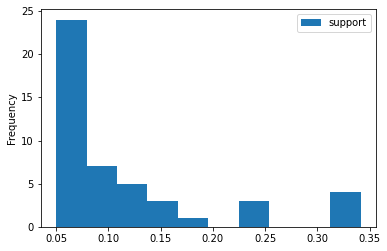

In [15]:
# With a minimum support of 0.05 we get to way less information out of our dataset.
a_rules1 = apriori(preprodf_clean, min_support = 0.05, use_colnames = True)
a_rules1.plot.hist()
a_rules1.describe()

,support
count,275.000000
mean,0.037036
std,0.050413
min,0.010085
25%,0.013469
50%,0.019904
75%,0.038084
max,0.341295


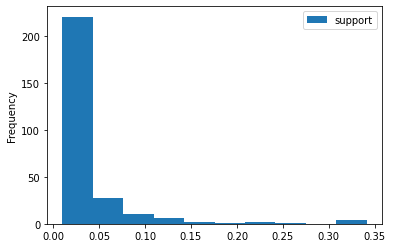

In [16]:
# Using a minimum support of 0.01 seems to generate a fair amount of rules.
a_rules2 = apriori(preprodf_clean, min_support = 0.01, use_colnames = True)
a_rules2.plot.hist()
a_rules2.describe()

,support
count,514.000000
mean,0.023095
std,0.039781
min,0.005042
25%,0.007166
50%,0.010616
75%,0.021729
max,0.341295


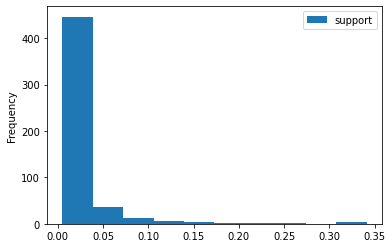

In [17]:
# With a minimum support of 0.005 we get too many rules and unnecessary information.
a_rules3 = apriori(preprodf_clean, min_support = 0.005, use_colnames = True)
a_rules3.plot.hist()
a_rules3.describe()

**Observations**: 

Choosing the right min_support can be a challenging thing. Minimum support helps us to identify frequent patterns and rules between the different itemsets. The smaller it gets the more rules we allow to 'pass', with the danger of letting rules without useful information to be generated. To choose the correct minimum support threshold we must first decide what's important for us to analyse. Maybe the marketing team wants relations between many items, meaning we need to have a small minimum support. Also, minimum support can help us with the execution time of apriori and the memory that apriori is going to use. The purpose of minimum support is to exclude rules that are of no interest to us. We choose minimum support according to our needs and requirements.


## Generating association rules
Choosing **min_support equal to 0.01** seems to be close to the best case for our needs since when choosing 0.1 we get no rules and when choosing 0.001 we get too many rules. 

Now we can use apriori and association_rules **with** and **without** the basket_value and then analyse our top 20 confidence rules.


In [18]:
# Using everything except basket values
products = preprodf_clean.drop(['low_value_basket', 'medium_value_basket', 'high_value_basket'], axis=1)
a_rules = apriori(products, min_support = 0.01, use_colnames = True)
association_rules(a_rules, metric = 'confidence', min_threshold = 0.01).sort_values('confidence', ascending=False).head(20)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
419,"(other vegetables, root vegetables, yogurt)",(whole milk),0.016852,0.333466,0.010218,0.606299,1.818174,0.004598,1.692996
154,"(citrus fruit, root vegetables)",(other vegetables),0.023089,0.252521,0.013535,0.586207,2.321416,0.007705,1.806407
210,"(root vegetables, tropical fruit)",(other vegetables),0.027468,0.252521,0.016056,0.584541,2.314819,0.009120,1.799164
185,"(root vegetables, tropical fruit)",(whole milk),0.027468,0.333466,0.015658,0.570048,1.709464,0.006498,1.550253
316,"(yogurt, root vegetables)",(whole milk),0.033705,0.333466,0.018976,0.562992,1.688304,0.007736,1.525222
421,"(yogurt, root vegetables, whole milk)",(other vegetables),0.018976,0.252521,0.010218,0.538462,2.132342,0.005426,1.619537
286,"(rolls/buns, root vegetables)",(whole milk),0.031714,0.333466,0.016587,0.523013,1.568413,0.006011,1.397383
179,"(yogurt, tropical fruit)",(whole milk),0.038217,0.333466,0.019772,0.517361,1.551466,0.007028,1.381020
148,"(citrus fruit, root vegetables)",(whole milk),0.023089,0.333466,0.011943,0.517241,1.551107,0.004243,1.380678
323,"(yogurt, pastry)",(whole milk),0.023089,0.333466,0.011943,0.517241,1.551107,0.004243,1.380678


Quite the interesting results! We can see that probably 'whole milk' and 'root vegetables' are the items that are frequently bought together. The connection between items and the 'whole milk' item seems to be quite common. It appears that 'whole milk' and 'root vegetables' are some of the most likely additions to the basket. We can also notice that most of the top confidence rules have a combination of a vegetable a fruit or a dairy item, which is quite amusing! 

One expected rule is that customers that buy 'root vegetables' and 'citrus_fruit' are 2.32(lift) likely to also buy 'other vegetables'.

In [19]:
# Using everything, basket valuea included
a_rules = apriori(preprodf_clean, min_support = 0.01, use_colnames = True)
association_rules(a_rules, metric = 'confidence', min_threshold = 0.01).sort_values('confidence', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1325,"(whole milk, pastry, soda)",(high_value_basket),0.010748,0.325504,0.010748,1.000000,3.072157,0.007250,inf
641,"(sausage, soda)",(high_value_basket),0.031714,0.325504,0.031714,1.000000,3.072157,0.021391,inf
563,"(chocolate, pastry)",(high_value_basket),0.010483,0.325504,0.010483,1.000000,3.072157,0.007071,inf
1450,"(sausage, rolls/buns, soda)",(high_value_basket),0.012606,0.325504,0.012606,1.000000,3.072157,0.008503,inf
580,"(bottled water, sausage)",(high_value_basket),0.015658,0.325504,0.015658,1.000000,3.072157,0.010561,inf
533,"(sausage, rolls/buns)",(high_value_basket),0.039942,0.325504,0.039809,0.996678,3.061950,0.026808,203.023222
443,"(sausage, whole milk)",(high_value_basket),0.039013,0.325504,0.038880,0.996599,3.061707,0.026181,198.301752
490,"(other vegetables, sausage)",(high_value_basket),0.035165,0.325504,0.035032,0.996226,3.060563,0.023586,178.741375
545,"(rolls/buns, pastry)",(high_value_basket),0.027335,0.325504,0.027203,0.995146,3.057243,0.018305,138.946125
604,"(yogurt, sausage)",(high_value_basket),0.025610,0.325504,0.025478,0.994819,3.056239,0.017141,130.177680


Adding the basket_value resulted in a big change to our association rules! We can notice that buying 'chocolate', 'pastry' or 'sausage' will most of the time result a high value basket! We can derive information that probably 'chocolate', 'pastry', 'sausage' and 'rolls/buns' are some of the most expensive products, because they appear at the top of our association rules. Also, it's quite interesting that we have 'high_value_basket' as a consequent in **all** top confidence rules! Pastry is probably the most expensive product of them all.

# Exercise 3 - Transaction grouping/KMeans Clustering

## KMeans Clustering
The marketing department has informed us that it would be very useful if we could find different groups amongst the transactions. For example, high valued transactions that happened in the past but no longer occur.

We are going to use only two of the columns, 'basket_value' and 'recency_days', to form 5 different clusters with the use of **sklearn.cluster.KMeans**.

In [20]:
# from mlxtend.cluster import Kmeans
from sklearn.cluster import KMeans

# Keep only basket_value and recency_days
meansdf = df[['basket_value', 'recency_days']]

# Create list of lists for KMeans
record_list = np.array([[meansdf.iloc[i,0], meansdf.iloc[i, 1]] for i in range(len(meansdf))])

# Fitting data and predicting values
km = KMeans(n_clusters=5, random_state=5).fit(record_list)
y_clust = km.predict(record_list)
y_clustdf = pd.DataFrame(y_clust, columns=['cluster'])
print('Iterations:', km.n_iter_)
print('Cluster centers:', km.cluster_centers_)
y_clustdf

Iterations: 5
Cluster centers: [[ 5.53203883 70.78586839]
 [ 8.13607908 21.48517298]
 [ 2.86796036 55.00825764]
 [ 4.75352113  6.69265594]
 [ 3.86052009 37.6107171 ]]


,cluster
0,3
1,4
2,3
3,3
4,0
...,...
7531,1
7532,1
7533,3
7534,4


Now we can plot our results and see the different clusters that were created.

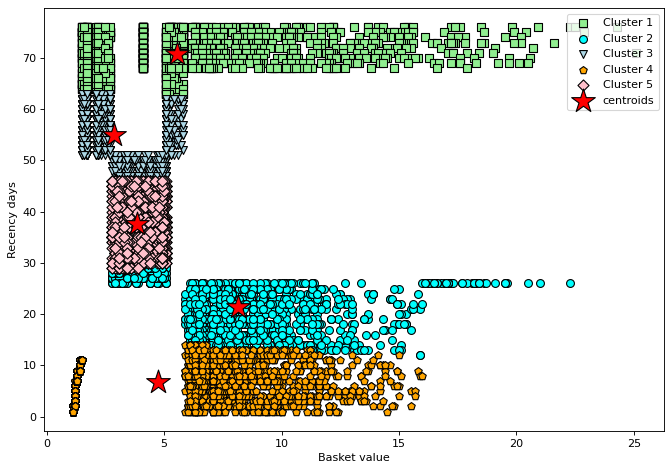

In [21]:
plt.figure(figsize=(10, 7), dpi=80)
plt.scatter(record_list[y_clust == 0, 0],
            record_list[y_clust == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='Cluster 1',
            edgecolors='black')

plt.scatter(record_list[y_clust == 1, 0],
            record_list[y_clust == 1, 1],
            s=50,
            c='cyan',
            marker='o',
            label='Cluster 2',
            edgecolors='black')

plt.scatter(record_list[y_clust == 2,0],
            record_list[y_clust == 2,1],
            s=50,
            c='lightblue',
            marker='v',
            label='Cluster 3',
            edgecolors='black')

plt.scatter(record_list[y_clust == 3,0],
            record_list[y_clust == 3,1],
            s=50,
            c='orange',
            marker='p',
            label='Cluster 4',
            edgecolors='black')

plt.scatter(record_list[y_clust == 4,0],
            record_list[y_clust == 4,1],
            s=50,
            c='pink',
            marker='D',
            label='Cluster 5',
            edgecolors='black')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=500,
            c='red',
            marker='*',
            label='centroids',
            edgecolors='black')


plt.xlabel("Basket value")
plt.ylabel("Recency days")
plt.legend(loc='upper right',
           scatterpoints=1)
plt.show()

## Ιnterpreting cluster results

In [22]:
# Calculate mean, standard deviation and percentages
basket_value = [[record_list[y_clust == i,0].mean(),record_list[y_clust == i,0].std()] for i in range(5)]
recency_days = [[record_list[y_clust == i,1].mean(),record_list[y_clust == i,1].std()] for i in range(5)]
percentage = [[round(len(record_list[y_clust == i,0]) * 100/ len(y_clust),2)] for i in range(5)]

# Create new dataframes to concat information
basket_valuedf = pd.DataFrame(basket_value, columns=['mean','std'])
recency_daysdf = pd.DataFrame(recency_days, columns=['mean','std'])
percentagedf = pd.DataFrame(percentage, columns=['percentage'])

# Create unified analysis DataFrame
analysisdf = pd.concat([basket_valuedf, recency_daysdf, percentagedf], axis=1, keys=['basket_value','recency_days', ''])
analysisdf.index.name = 'cluster'
analysisdf = analysisdf.rename(index={0:'Cluster1', 1:'Cluster2', 2:'Cluster3', 3:'Cluster4', 4:'Cluster5'})
analysisdf

basket_value           recency_days                     
                 mean       std         mean       std percentage
cluster                                                          
Cluster1     5.532039  4.295572    70.785868  3.405053      24.60
Cluster2     8.112407  3.495888    21.606286  4.571877      16.04
Cluster3     2.867960  1.275817    55.008258  4.800385      16.07
Cluster4     4.774000  3.974148     6.734500  3.406759      26.54
Cluster5     3.859192  0.741325    37.658479  4.969144      16.75

**Ιnterpreting the results:**

Cluster 1: Group of very old transactions of medium-high value basket that make up about 24.6 % of whole transactions

Cluster 2: Group of somewhat recent transactions of high value basket that make up about 16.04 % of whole transactions

Cluster 3: Group of old transactions of low-medium value basket that make up about 16.07 % of whole transactions

Cluster 4: Group of new transactions of medium-high value basket that make up about 26.54 % of whole transactions

Cluster 5: Group of somewhat recent transactions of medium value basket that make up about 16.75 % of whole transactions

**Worrying results:**

The graph above is quite interesting for the marketing team! In particular, it appears that 1/4 of the transactions happened about 2 months ago and they were mostly medium to high valued baskets! The marketing team should be concerned about Cluster1 and Cluster3 because transactions were cut from 24.6 % (second highest) to 16.07 % (second lowest) and the basket value went from medium-high value to mostly low value. Something happened about 65 days ago that changed the behavior of the customers.

Only after 40 days do high value basket transactions begin to appear again, meaning that Cluster1 and Cluster2 have probably something in common and something happened in Cluster3 and Cluster5.

## New cluster column and encoding
We can add the generated clusters to our dataset by creating a new column named 'cluster' which will hold the cluster that the transaction belongs to and then passing it through the **TransactionEncoder**. This is done because we want to use this new information to generate new association rules with the use of the apriori algorithm.   

In [23]:
clusterdf = pd.DataFrame(y_clust, columns=['cluster'])
clusterdf.loc[clusterdf.cluster == 0, 'cluster'] = 'Cluster1'
clusterdf.loc[clusterdf.cluster == 1, 'cluster'] = 'Cluster2'
clusterdf.loc[clusterdf.cluster == 2, 'cluster'] = 'Cluster3'
clusterdf.loc[clusterdf.cluster == 3, 'cluster'] = 'Cluster4'
clusterdf.loc[clusterdf.cluster == 4, 'cluster'] = 'Cluster5'
clusterdf

,cluster
0,Cluster4
1,Cluster5
2,Cluster4
3,Cluster4
4,Cluster1
...,...
7531,Cluster2
7532,Cluster2
7533,Cluster4
7534,Cluster5


In [24]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder()
encoder_array = encoder.fit(clusterdf.values).transform(clusterdf.values)
clusterdf = pd.DataFrame(encoder_array, columns = encoder.columns_)
clusterdf.astype(int)

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
7531,0,1,0,0,0
7532,0,1,0,0,0
7533,0,0,0,1,0
7534,0,0,0,0,1


# Exercise 4 - Describing product and general group profiles using association rules
Now we can use this new information with our previously used prepro_df_clean dataframe to generate a new set of association rules. These new association rules will be used to describe the product profile of each transaction group.

In [25]:
# Adding the new cluster feature to the preprocessed dataframe from exercise 1
preprodf_clean = pd.concat([preprodf_clean, clusterdf], axis=1)
preprodf_clean.astype(int)

,low_value_basket,medium_value_basket,high_value_basket,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,...,sausage,root vegetables,pastry,soda,cream,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7531,0,0,1,1,0,1,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
7532,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7533,0,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7534,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


## Generating association rules
With the help of the new 'cluster' column we can generate new association rules and analyze the behavior of each cluster group. Like Exercise 2, we can calculate new association rules **with** and **without** the attribute 'basket_value'.

In [26]:
# Using everything except basket values
products = preprodf_clean.drop(['low_value_basket', 'medium_value_basket', 'high_value_basket'], axis=1)
a_rules = apriori(products, min_support = 0.01, use_colnames = True)
association_rules(a_rules, metric = 'confidence', min_threshold = 0.01).sort_values('confidence', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
220,(pastry),(Cluster1),0.116109,0.246019,0.116109,1.000000,4.064725,0.087544,inf
790,"(other vegetables, pastry)",(Cluster1),0.029459,0.246019,0.029459,1.000000,4.064725,0.022211,inf
1006,"(other vegetables, whole milk, pastry)",(Cluster1),0.013800,0.246019,0.013800,1.000000,4.064725,0.010405,inf
960,"(pastry, soda)",(Cluster1),0.027468,0.246019,0.027468,1.000000,4.064725,0.020710,inf
862,"(rolls/buns, pastry)",(Cluster1),0.027335,0.246019,0.027335,1.000000,4.064725,0.020610,inf
286,"(citrus fruit, pastry)",(Cluster1),0.012739,0.246019,0.012739,1.000000,4.064725,0.009605,inf
1034,"(yogurt, whole milk, pastry)",(Cluster1),0.011943,0.246019,0.011943,1.000000,4.064725,0.009005,inf
880,"(pastry, chocolate)",(Cluster1),0.010483,0.246019,0.010483,1.000000,4.064725,0.007904,inf
892,"(bottled water, pastry)",(Cluster1),0.011677,0.246019,0.011677,1.000000,4.064725,0.008804,inf
1051,"(whole milk, pastry, soda)",(Cluster1),0.010748,0.246019,0.010748,1.000000,4.064725,0.008104,inf


**Interpreting the results:**

We notice that Cluster1 mostly bought the expensive items of the market, like 'pastry', 'sausage' and 'chocolate', while sometimes buying the low valued items like 'whole milk', 'soda' and 'vegetables'. In exercice 3, we saw that the Cluster1 was a worrying group for the marketing team. Seeing the results we get from the association rules, we understand that probably something happend with one or more of 'pastry', 'sausage' and 'chocolate'. Maybe they were of poor quality or maybe the market run out of stock or maybe that the market was on sales.

Οnly Cluster1 appears when picking the top 20 confidence rules so we cannot draw conclusions for the other clusters.

In [27]:
# Using everything, basket valuea included
a_rules = apriori(preprodf_clean, min_support = 0.01, use_colnames = True)
association_rules(a_rules, metric = 'confidence', min_threshold = 0.01).sort_values('confidence', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1614,"(whole milk, pastry)",(Cluster1),0.043392,0.246019,0.043392,1.0,4.064725,0.032717,inf
1926,"(other vegetables, Cluster5, whole milk)",(medium_value_basket),0.012872,0.333068,0.012872,1.0,3.002390,0.008584,inf
3470,"(other vegetables, high_value_basket, whole mi...",(pastry),0.013668,0.116109,0.013668,1.0,8.612571,0.012081,inf
1954,"(Cluster5, root vegetables, whole milk)",(medium_value_basket),0.010350,0.333068,0.010350,1.0,3.002390,0.006903,inf
546,"(Cluster5, chocolate)",(medium_value_basket),0.014597,0.333068,0.014597,1.0,3.002390,0.009735,inf
540,"(Cluster5, rolls/buns)",(medium_value_basket),0.042330,0.333068,0.042330,1.0,3.002390,0.028231,inf
1940,"(Cluster5, rolls/buns, whole milk)",(medium_value_basket),0.015525,0.333068,0.015525,1.0,3.002390,0.010354,inf
516,"(other vegetables, Cluster5)",(medium_value_basket),0.038615,0.333068,0.038615,1.0,3.002390,0.025753,inf
1920,"(pastry, soda)",(Cluster1),0.027468,0.246019,0.027468,1.0,4.064725,0.020710,inf
558,"(bottled water, Cluster5)",(medium_value_basket),0.028264,0.333068,0.028264,1.0,3.002390,0.018850,inf


**Interpreting the results:**

Now we can actually see almost all the Clusters. Cluster 5 seems to always have a medium value basket, confirming our results from exercise 3, buying medium valued items like 'whole milk' and 'vegetables'. Cluster4 seems to be buying the expensive items of the market like 'sausage' and 'soda'. Cluster3 unfortunately does not appear in the top 20 confidence rules.

After the new results, we are more certain that probably 'pastry', 'chocolate' and 'sausage' are the most expensive items. Buying one of these items commonly results in a high value basket.